# Workshop #5. Basics of `scanpy`

Firstly, let's install necessary Python packages.

In [1]:
!pip install scanpy[leiden] scrublet
!gdown "1Ctq4EmV2ps1dMiFcbqW467ywezRSGGN0&confirm=t"
!unzip PBMC_10k.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.1 MB/s eta 0:00:00
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552450 sha256=4c3a4fd02a622dda1fe4aef797d8a650d3fb39c1f56e08d012e960208038ccf9
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
  Create

## AnnData

In [2]:
import scanpy as sc
import seaborn as sns
import numpy as np

# `verbosity = 3` means show every log message
sc.settings.verbosity = 3

In [3]:
# Reading the dataset

adata = sc.read_10x_h5("filtered_feature_bc_matrix.h5")

reading filtered_feature_bc_matrix.h5
 (0:00:04)


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
# Make gene names unique

adata.var_names_make_unique()

In [5]:
# Expression matrix

adata.X

<11996x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 27164608 stored elements in Compressed Sparse Row format>

In [6]:
# Sparse to dense matrix transformation

adata.X.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
# Dense to sparse matrix transformation

from scipy.sparse import csr_matrix

X = np.array([[0, 1], [0, 0]])
X

array([[0, 1],
       [0, 0]])

In [8]:
X_sparse = csr_matrix(X)
X_sparse

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [9]:
# How to create AnnData manually

my_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
my_adata = sc.AnnData(X=my_matrix)

my_adata

AnnData object with n_obs × n_vars = 3 × 3

In [10]:
# DataFrame with cells' annotation
adata.obs

""
AAACCCAAGGCCCAAA-1
AAACCCAAGTAATACG-1
AAACCCAAGTCACACT-1
AAACCCACAAAGCGTG-1
AAACCCACAATCGAAA-1
...
TTTGTTGGTTGGATCT-1
TTTGTTGGTTTCTTAC-1
TTTGTTGTCCATTTCA-1
TTTGTTGTCTACACAG-1


In [11]:
adata.obs["tissue"] = "PBMC"
adata.obs

,tissue
AAACCCAAGGCCCAAA-1,PBMC
AAACCCAAGTAATACG-1,PBMC
AAACCCAAGTCACACT-1,PBMC
AAACCCACAAAGCGTG-1,PBMC
AAACCCACAATCGAAA-1,PBMC
...,...
TTTGTTGGTTGGATCT-1,PBMC
TTTGTTGGTTTCTTAC-1,PBMC
TTTGTTGTCCATTTCA-1,PBMC
TTTGTTGTCTACACAG-1,PBMC


In [12]:
# Categorical Series

adata.obs["tissue"] = adata.obs.tissue.astype("category")
adata.obs.tissue

AAACCCAAGGCCCAAA-1    PBMC
AAACCCAAGTAATACG-1    PBMC
AAACCCAAGTCACACT-1    PBMC
AAACCCACAAAGCGTG-1    PBMC
AAACCCACAATCGAAA-1    PBMC
                      ... 
TTTGTTGGTTGGATCT-1    PBMC
TTTGTTGGTTTCTTAC-1    PBMC
TTTGTTGTCCATTTCA-1    PBMC
TTTGTTGTCTACACAG-1    PBMC
TTTGTTGTCTCATTAC-1    PBMC
Name: tissue, Length: 11996, dtype: category
Categories (1, object): ['PBMC']

In [13]:
# DataFrame with genes' annotation

del adata.var["genome"], adata.var["feature_types"]
adata.var["mt"] = adata.var.index.str.startswith("MT-")
adata.var

,gene_ids,mt
MIR1302-2HG,ENSG00000243485,False
FAM138A,ENSG00000237613,False
OR4F5,ENSG00000186092,False
AL627309.1,ENSG00000238009,False
AL627309.3,ENSG00000239945,False
...,...,...
AC141272.1,ENSG00000277836,False
AC023491.2,ENSG00000278633,False
AC007325.1,ENSG00000276017,False
AC007325.4,ENSG00000278817,False


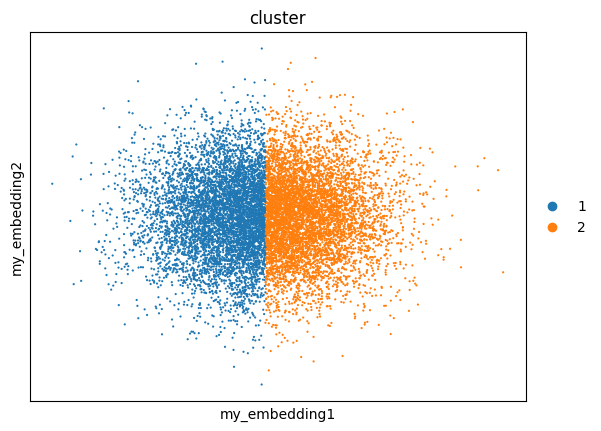

In [14]:
# Embeddings plotting

adata.obsm["my_embedding"] = np.random.normal(size=(11996, 2))
adata.obs["cluster"] = ["1" if i else "2" for i in (adata.obsm["my_embedding"][:, 0] < 0)]

sc.pl.embedding(adata, basis="my_embedding", color="cluster")

In [15]:
# Subselection in AnnData objects

adata[["TTTGTTGTCTCATTAC-1", "TTTGTTGGTTGGATCT-1"], ["CD4", "CD8A"]]

View of AnnData object with n_obs × n_vars = 2 × 2
    obs: 'tissue', 'cluster'
    var: 'gene_ids', 'mt'
    uns: 'cluster_colors'
    obsm: 'my_embedding'

In [16]:
# Layers in AnnData object

adata.layers["counts"] = adata.X.copy()
adata.layers["counts"]

<11996x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 27164608 stored elements in Compressed Sparse Row format>

In [17]:
# Saving AnnData object

adata.write_h5ad("adata.h5ad")

## Diagnostic plots for cells' QC

<Axes: ylabel='Count'>

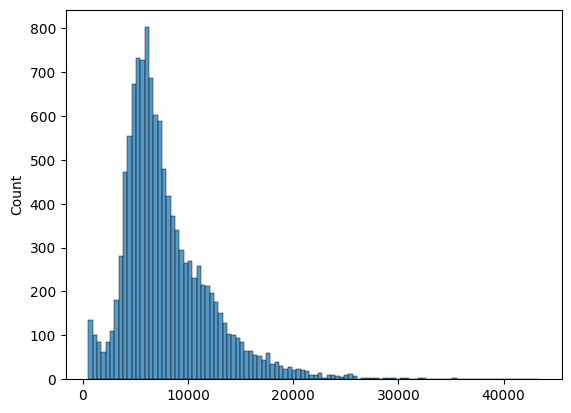

In [18]:
# UMI per cell distribution

counts_per_cell = adata.X.sum(axis=1).A.T[0]
sns.histplot(counts_per_cell)

<Axes: ylabel='Count'>

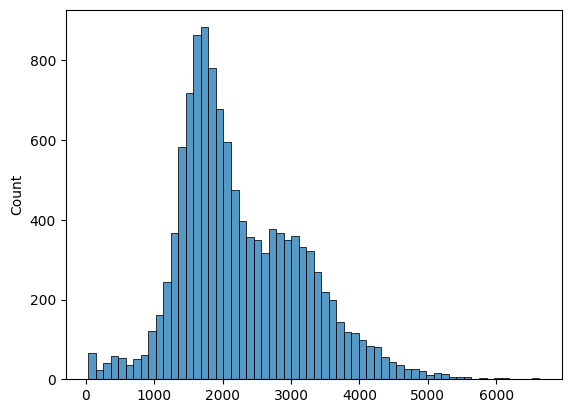

In [19]:
# Number of genes per cell distribution

genes_per_cell = (adata.X > 0).sum(axis=1).T.A[0]
sns.histplot(genes_per_cell)

<Axes: ylabel='Count'>

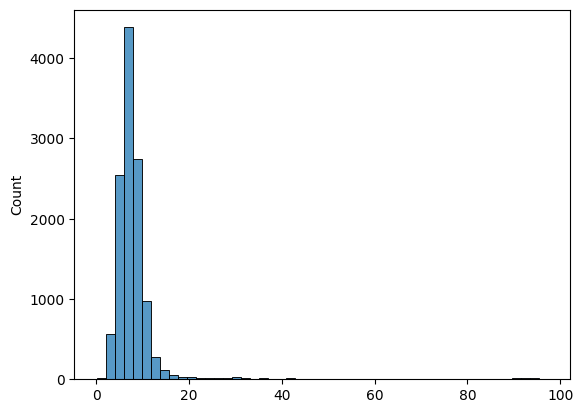

In [20]:
# % of mitochondrial expression per each cell distribution

mito_counts = adata[:, adata.var["mt"]].X.sum(axis=1).T.A[0]
mito_pct = mito_counts / counts_per_cell * 100
sns.histplot(mito_pct, bins=50)

# Hometask

## Task 1

Number of UMIs per cell in the dataset is distributed (approximately) bimodally. What is the reason for that? Please provide some papers and/or resourses when this phenomenon is described.

Так как клеточная популяция может быть неоднородна   
Shalek A. K. et al. Single-cell transcriptomics reveals bimodality in expression and splicing in immune cells


## Task 2

Using [Cellxgene Portal](https://cellxgene.cziscience.com/) please select the dataset of your scientific interest and perform QC. Are you happy with it? Please save files in `loom` format and describe the features of such a format.

In [21]:
!pip install scanpy[leiden] harmonypy symphonypy
!gdown "https://datasets.cellxgene.cziscience.com/dea35fd3-c576-4ca5-9c10-72546e312b2e.h5ad"

Downloading...
From: https://datasets.cellxgene.cziscience.com/dea35fd3-c576-4ca5-9c10-72546e312b2e.h5ad
To: /content/dea35fd3-c576-4ca5-9c10-72546e312b2e.h5ad
100% 240M/240M [00:01<00:00, 158MB/s]


In [22]:
adata = sc.read_h5ad("dea35fd3-c576-4ca5-9c10-72546e312b2e.h5ad")

In [23]:
adata.var_names_make_unique()

In [24]:
adata

AnnData object with n_obs × n_vars = 12330 × 23045
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'sample_description', 'full_description', 'author_age', 'condition', 'final_clusters', 'S.Score', 'G2M.Score', 'phase', 'male_genes', 'female_genes', 'sex_stringent', 'total_transcript_counts', 'unique_gene_count', 'cluster_name', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'developmental_stage_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'suspension_type', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference'

In [25]:
adata.var

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable,gene_symbols,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
ENSMUSG00000051951,0.030657,0.037019,0.036684,1.009131,True,Xkr4,False,Xkr4,NCBITaxon:10090,gene,6094
ENSMUSG00000102343,0.000162,0.000162,0.000166,0.974873,False,Gm37381,False,Gm37381,NCBITaxon:10090,gene,1364
ENSMUSG00000025900,0.000162,0.000162,0.000166,0.974873,False,Rp1,False,Rp1,NCBITaxon:10090,gene,12311
ENSMUSG00000025902,0.000973,0.000972,0.001048,0.927713,False,Sox17,False,Sox17,NCBITaxon:10090,gene,4772
ENSMUSG00000104328,0.000081,0.000081,0.000081,0.999750,True,Gm37323,False,Gm37323,NCBITaxon:10090,gene,2773
...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000079794,0.000162,0.000162,0.000166,0.974873,False,AC125149.2,False,ENSMUSG00000079794,NCBITaxon:10090,gene,255
ENSMUSG00000094915,0.000081,0.000081,0.000081,0.999750,True,AC168977.2,False,ENSMUSG00000094915,NCBITaxon:10090,gene,366
ENSMUSG00000079808,0.003812,0.003960,0.004298,0.921308,False,AC168977.1,False,ENSMUSG00000079808,NCBITaxon:10090,gene,1910
ENSMUSG00000095041,3.483536,8.139765,7.937358,1.025500,True,AC149090.1,False,ENSMUSG00000095041,NCBITaxon:10090,gene,4238


In [26]:
sc.pp.calculate_qc_metrics(
    adata,
    inplace=True,
    log1p=False,
    percent_top=None,
)

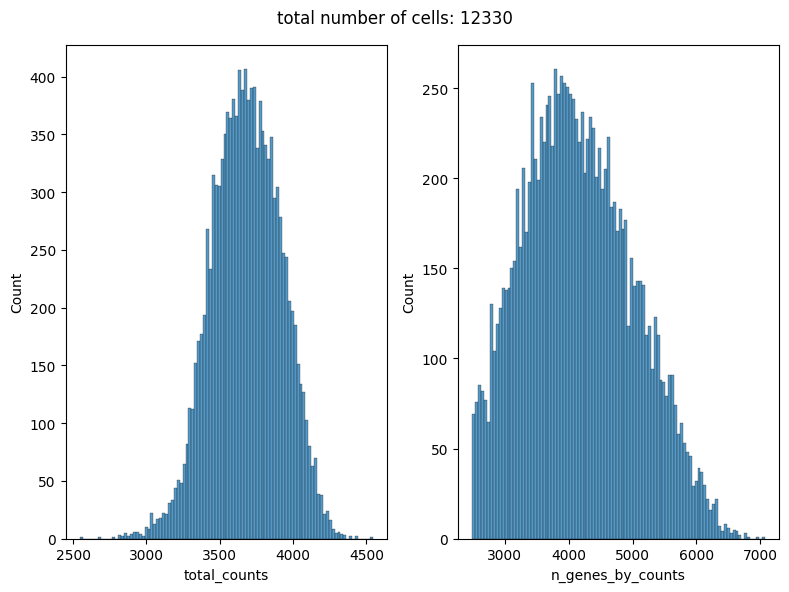

In [31]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 6))

sns.histplot(adata.obs.total_counts, ax=axes[0], bins=100)
sns.histplot(adata.obs.n_genes_by_counts, ax=axes[1], bins=100)
plt.suptitle(f"total number of cells: {len(adata)}")
fig.tight_layout()

Пустые капли вычищены

In [32]:
sc.pp.scrublet(adata)

Running Scrublet
filtered out 4218 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:08)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.65
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 9.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.4%
    Scrublet finished (0:04:04)


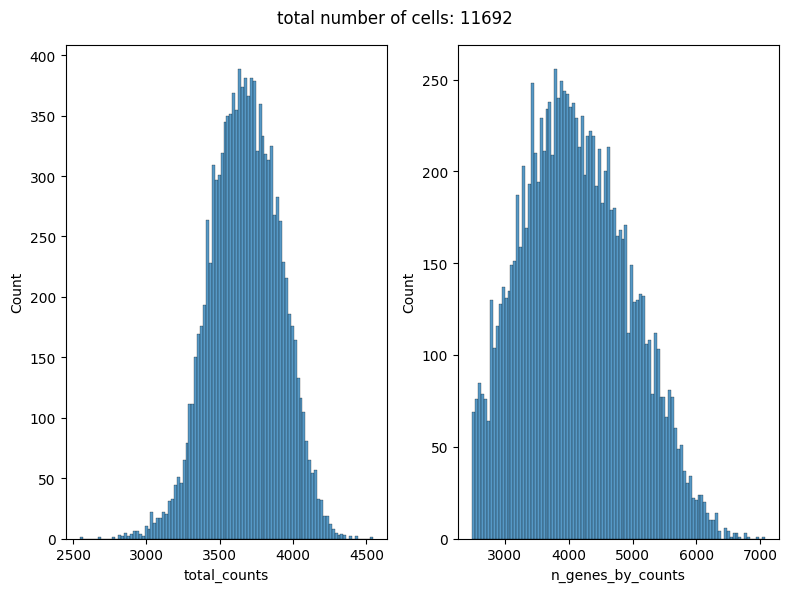

In [33]:
adata = adata[adata.obs.doublet_score <= 0.2]

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 6))

sns.histplot(adata.obs.total_counts, ax=axes[0], bins=100)
sns.histplot(adata.obs.n_genes_by_counts, ax=axes[1], bins=100)
# sns.histplot(adata.obs.pct_counts_mt, ax=axes[1, 0])#, bins=100)
# sns.histplot(adata.obs.pct_counts_ribo, ax=axes[1, 1], bins=100)

plt.suptitle(f"total number of cells: {len(adata)}")

fig.tight_layout()

In [34]:
!pip install loompy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.9 MB/s eta 0:00:00
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52019 sha256=042c3f7b26d2ab4afb657648eeb892f9d90c8ba9e6f4ca8a0022674b6a549ce6
  Stored in directory: /root/.cache/pip/wheels/2c/22/1f/792a4621bb631e538bf1c21feae9bbaa6b19fd6d6ab382d1fd
Successfully built loompy


In [37]:
import loompy

loompy.create(
    'adata.loom',
    adata.X.transpose(),
    row_attrs={'gene_ids': adata.var_names.tolist()},
    col_attrs={'cell_ids': adata.obs_names.tolist()}
)